# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9333333333333333

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target

# Filter for two classes (0 and 1) and keep only the first two features
# To achieve the goal of having only classes 0 and 1, and only the first two features:
mask = (y == 0) | (y == 1)
X_filtered = X[mask][:, :2] # Select first two features after filtering rows
y_filtered = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

print("Model accuracy:", svm_model.score(X_test, y_test))

Model accuracy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

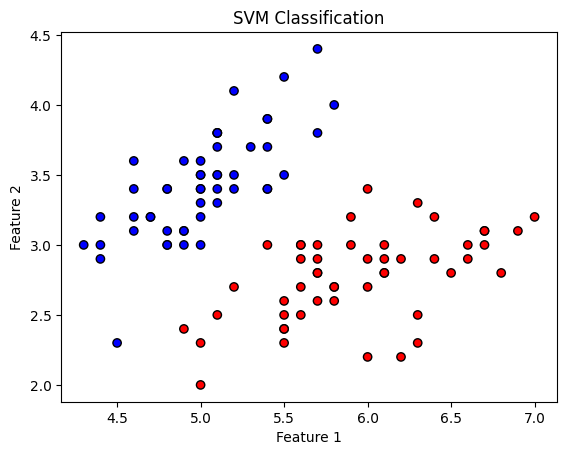

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('SVM Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [17]:
# Select rows where target is not 2 (!=2) and columns 0 and 1 (0:2)
X = iris.data[iris.target!=2, 0:2]
print(X.shape)

# Select corresponding targets
y = iris.target[iris.target!=2]

# Define model with linear kernel and C=200
SVMmodel_1 = SVC(kernel='linear', C=200)

# Split into train and test (exact test_size not visible in photo, using standard 0.2)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)

# Train the model
SVMmodel_1.fit(X_train_1, y_train_1)

# Show parameters and score
print(SVMmodel_1.get_params())
print(SVMmodel_1.score(X_test_1, y_test_1))

(100, 2)
{'C': 200, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 6.28325007 -5.14157648]]
[-17.4483732]


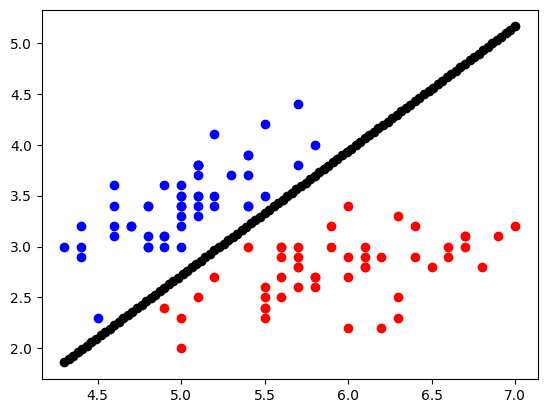

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Separating line coefficients:
W = SVMmodel_1.coef_
b = SVMmodel_1.intercept_
print(W)
print(b)

# Create 100 points on the X axis between the minimum and maximum of your data
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)

# Calculate corresponding points on Y axis using hyperplane equation:
# w0*x1 + w1*x2 + b = 0  --> solving for x2
x2 = -b/W[0,1] - W[0,0]/W[0,1]*x1

# Plot class points (filter where y==0 and where y==1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red')

# Plot decision line (professor uses scatter to draw line as points)
plt.scatter(x1, x2, color='black')
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

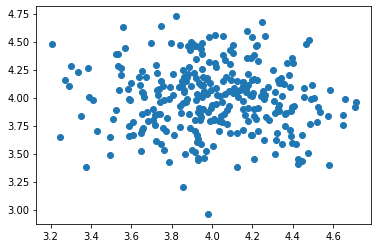

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

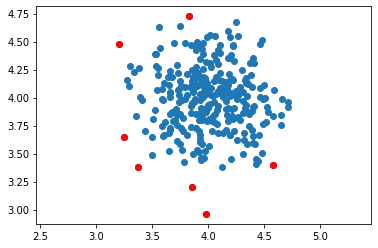

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

NameError: ignored